# Explore here

In [1]:
import pandas as pd
import seaborn as sns
import spotipy # type: ignore

from matplotlib import rcParams
from app import get_spotipy_instance, get_artist_tracks

## Get the spotify client

In [2]:
# spotipy client ready to use
spotify: spotipy.Spotify = get_spotipy_instance()

## Get the artist best 10 tracks

In [3]:
# artist to get the songs
# id of imagine dragons
imagine_dragons_id = "53XhwfbYqKCa1cC15pYq2q"

In [4]:
# get the tracks
tracks = get_artist_tracks(spotify=spotify, artist_id=imagine_dragons_id)  # type: ignore

In [5]:
# transform to dataframe 
df = pd.DataFrame(tracks)
df

,name,popularity,duration
0,Believer,81,3.405767
1,Demons,79,2.958433
2,Thunder,79,3.119100
3,Bones,76,2.754400
4,Enemy (with JID) - from the series Arcane Leag...,75,2.889683
5,Radioactive,75,3.113550
6,Whatever It Takes,77,3.354000
7,Natural,75,3.157767
8,Bad Liar,75,4.346217
9,On Top Of The World,71,3.204667


## Graph the data

In [ ]:
# config of sns
sns.set_theme()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_palette("rocket")

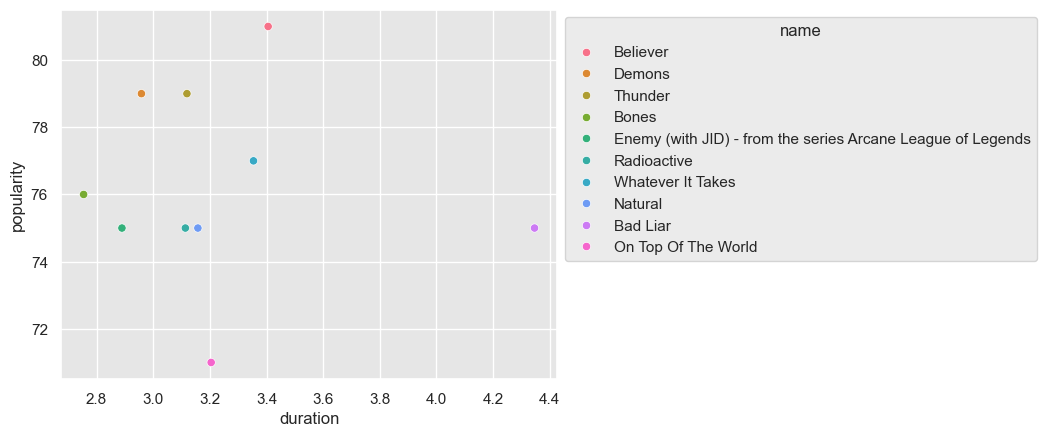

In [7]:
scatter_plot = sns.scatterplot(data=df, x="duration", y="popularity", hue="name")
sns.move_legend(scatter_plot, "upper left", bbox_to_anchor=(1, 1))

Now lets see the graph without the last track "Bad Liar" that is an outlier in duration

In [10]:
df_without_outlay = df[df['name'] != 'Bad Liar']
df_without_outlay

,name,popularity,duration
0,Believer,81,3.405767
1,Demons,79,2.958433
2,Thunder,79,3.119100
3,Bones,76,2.754400
4,Enemy (with JID) - from the series Arcane Leag...,75,2.889683
5,Radioactive,75,3.113550
6,Whatever It Takes,77,3.354000
7,Natural,75,3.157767
9,On Top Of The World,71,3.204667


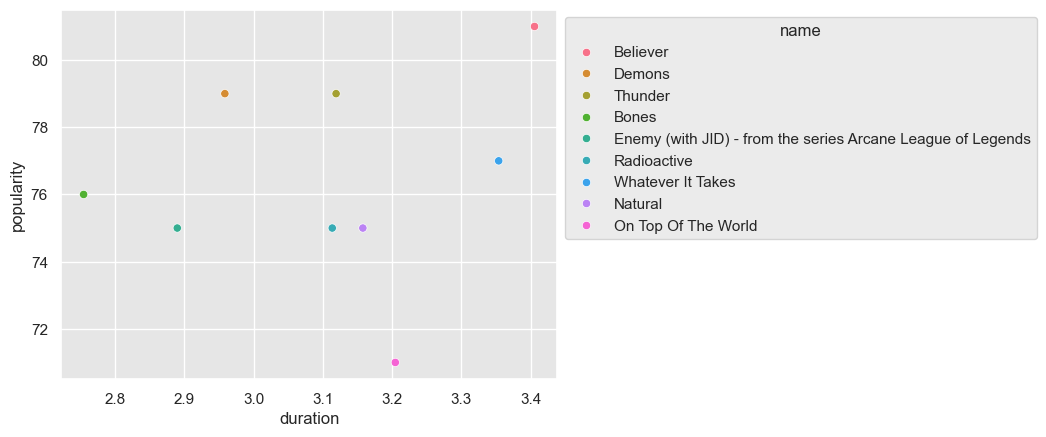

In [12]:
scatter_plot = sns.scatterplot(data=df_without_outlay, x="duration", y="popularity", hue="name")
sns.move_legend(scatter_plot, "upper left", bbox_to_anchor=(1, 1))

Now to get more info lets try t fit a linear model. With this we can atleast see the slope of the line and get some conclusion without the outline.

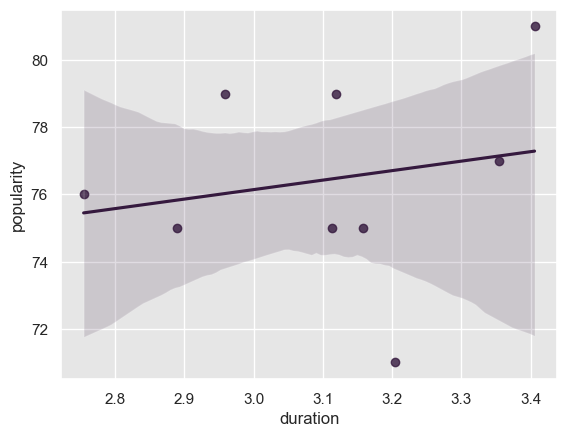

In [13]:
sns.regplot(x="duration", y="popularity", data=df_without_outlay);

With this we can see that the line has a positive slope so we can get to the conclusion that the duration of the track positively influences its popularity. But this conclusion has to be taken with a grain of salt, because the track "Bad Liar" was a outlier because its duration was really different from the other tracks, to get a better conclusion more songs, in the interval of 3.4 min to 4.4 min, are needed.